In [ ]:
!pip install numpy matplotlib


Время расчета для Lx=2: 27.97 секунд
Время расчета для Lx=3: 29.45 секунд
Время расчета для Lx=4: 34.35 секунд
Время расчета для Lx=5: 38.68 секунд
Время расчета для Lx=6: 40.94 секунд
Время расчета для Lx=7: 45.77 секунд
Время расчета для Lx=8: 49.02 секунд
Lx=2: [-2.99991599 -2.99943643 -2.99734582 -2.99105731 -2.97950714 -2.95666646
 -2.92330208 -2.87362746 -2.82621539 -2.69860773 -2.60702691 -2.49805983
 -2.41447117 -2.28218492 -2.08505544 -2.03278457 -1.91608887 -1.72450759
 -1.71300777 -1.58724991 -1.524383   -1.44542515 -1.34740287 -1.38582075
 -1.31716203 -1.26117628 -1.11356699 -1.08971481 -1.02271344 -0.97522415
 -1.02926625 -1.01464616 -0.93156453 -0.84559285 -0.88910957 -0.81663014
 -0.80745269 -0.77533461 -0.72021881 -0.74834783 -0.70393747 -0.76062073
 -0.64862623 -0.69383707 -0.6618589  -0.6033403 ]
Lx=3: [-2.99994812 -2.99968645 -2.99726897 -2.99027924 -2.98044117 -2.9725649
 -2.82749036 -2.81892376 -2.72301422 -2.73549789 -2.71145644 -2.55660442
 -2.28081989 -2.2313357

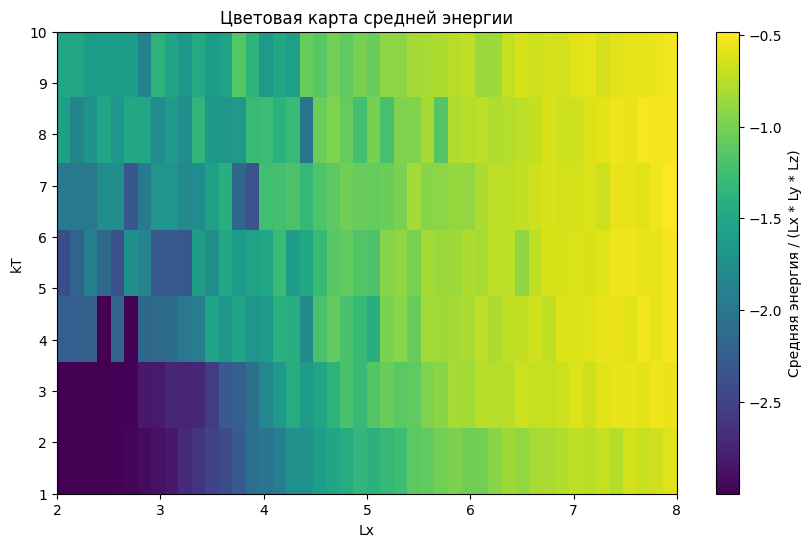

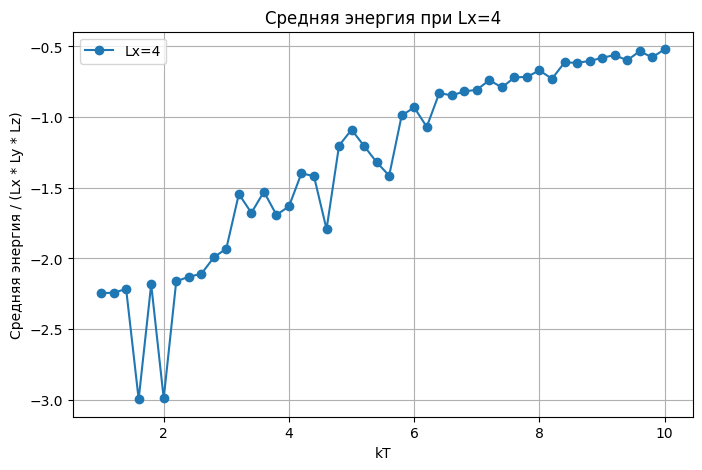

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

def calculate_energy(spins, Lx, Ly, Lz):
    """
    Рассчитываем энергию системы в модели Изинга для заданного набора спинов и размеров решетки
    """
    energy = 0
    for x in range(Lx):
        for y in range(Ly):
            for z in range(Lz):
                energy -= (
                    spins[x, y, z] * (spins[(x + 1) % Lx, y, z] +  # взаимодействие по x
                                      spins[x, (y + 1) % Ly, z] +  # взаимодействие по y
                                      spins[x, y, (z + 1) % Lz])   # взаимодействие по z
                )
    return energy

def monte_carlo_average_energy(Lx, Ly, Lz, kT, num_samples=10000):
    """
    Рассчитываем приближенное нормированное значение средней энергии для заданной температуры
    методом Монте-Карло(он позволяет быстро получить приближенное значение средней энергии, выбирая случайные состояния)
    Это нужно Чтобы ускорить выполнение кода, надо оптимизировать перебор всех возможных состояний решетки, тк полный перебор для больших значений 𝐿𝑥
    экспоненциально увеличивает время выполнения.
    """
    beta = 1 / kT
    Z = 0
    E_avg = 0

    for _ in range(num_samples):
        # Генерация случайной конфигурации спинов
        spins = np.random.choice([-1, 1], size=(Lx, Ly, Lz))
        energy = calculate_energy(spins, Lx, Ly, Lz)
        weight = np.exp(-beta * energy)
        Z += weight
        E_avg += energy * weight

    return E_avg / Z / (Lx * Ly * Lz)

def main():
    """
    Основная функция для расчета нормированного значения средней энергии при разных Lx и kT
    методом Монте-Карло, сохранение результатов и построение графиков
    """
    L_y = L_z = 2
    Lx_values = range(2, 9)
    kT_values = np.arange(1.0, 10.2, 0.2)

    energies = np.zeros((len(Lx_values), len(kT_values)))

    for i, Lx in enumerate(Lx_values):
        start_time = time.time()
        for j, kT in enumerate(kT_values):
            energies[i, j] = monte_carlo_average_energy(Lx, L_y, L_z, kT)
        end_time = time.time()
        print(f"Время расчета для Lx={Lx}: {end_time - start_time:.2f} секунд")

    # Сохраняем массив в файл
    np.save('energies.npy', energies)

    # Выводим значения средней энергии для проверки корректности
    for i, Lx in enumerate(Lx_values):
        print(f"Lx={Lx}: {energies[i]}")

    # Построение цветовой карты
    plt.figure(figsize=(10, 6))
    plt.imshow(energies, aspect='auto', cmap='viridis', origin='lower',
               extent=[Lx_values[0], Lx_values[-1], kT_values[0], kT_values[-1]])
    plt.colorbar(label='Средняя энергия / (Lx * Ly * Lz)')
    plt.xlabel('Lx')
    plt.ylabel('kT')
    plt.title('Цветовая карта средней энергии')
    plt.show()

    # Построение графика для Lx=4
    plt.figure(figsize=(8, 5))
    plt.plot(kT_values, energies[2], marker='o', label='Lx=4')  # индекс 2 соответствует Lx=4
    plt.xlabel('kT')
    plt.ylabel('Средняя энергия / (Lx * Ly * Lz)')
    plt.title('Средняя энергия при Lx=4')
    plt.grid(True)
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()
